In [1]:
import torch
import matplotlib.pyplot as plt
from accelerate import Accelerator
from tqdm import tqdm

from m2_utilities.load_data import load_trajectories
from m2_utilities.qwen import load_qwen
from m2_utilities.metrics import gen_points, compute_metrics
from m2_utilities.preprocessor import Preprocessor
from m2_utilities.flops import compute_flops_gen


%load_ext autoreload
%autoreload 2

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


### Loading the Model and Data

In [2]:
# Model
model, tokenizer = load_qwen()

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [7]:
# Loading trajectories
trajectories = load_trajectories("data/lotka_volterra_data.h5")

val_trajectories = trajectories[700:850]

### Visualising Autoregressive Inference of Time Points

In [15]:
future_points = gen_points(model, val_trajectories[1:2, :55], n_points=25, decimals=2)

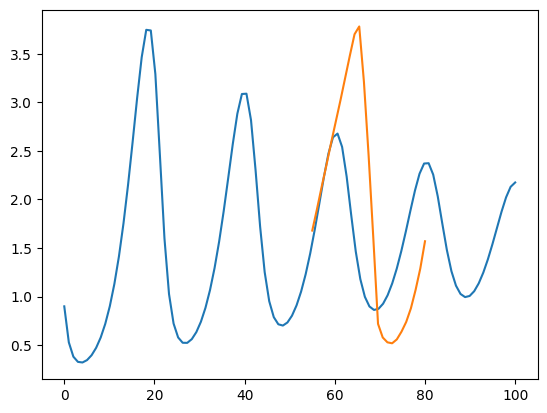

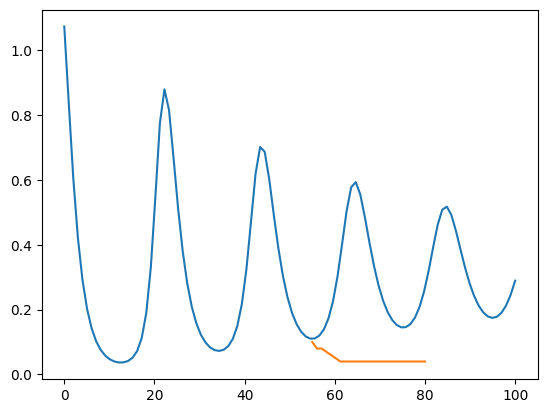

In [16]:
N_FORECAST = 25
plt.plot(torch.linspace(0, 100, 100), val_trajectories[1, :, 0])
plt.plot(torch.linspace(55, 55 + N_FORECAST, N_FORECAST), future_points[0, :, 0])
plt.show()

plt.plot(torch.linspace(0, 100, 100), val_trajectories[1, :, 1])
plt.plot(torch.linspace(55, 55 + N_FORECAST, N_FORECAST), future_points[0, :, 1])
plt.show()

### Computing MAE/MRAE Metrics

In [25]:
future_points = gen_points(model, test_trajectories[:, :80], n_points=20, decimals=2)

Predator MRAEs: 1.827694296836853
Prey MRAEs: 1.1078088283538818


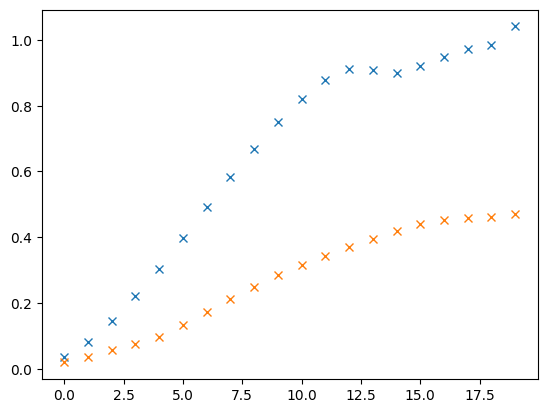

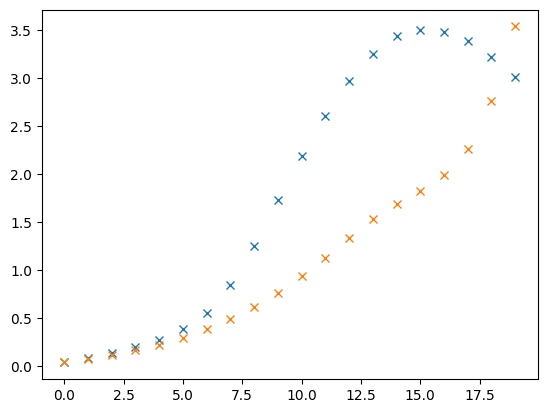

In [28]:
pred_maes, prey_maes, pred_mraes, prey_mraes = compute_metrics(test_trajectories[:, 80:], future_points)

print(f"Predator MRAEs: {torch.mean(pred_mraes)}")
print(f"Prey MRAEs: {torch.mean(prey_mraes)}")

plt.plot(torch.linspace(0, 19, 20), pred_maes, "x")
plt.plot(torch.linspace(0, 19, 20), prey_maes, "x")
plt.show()

plt.plot(torch.linspace(0, 19, 20), pred_mraes, "x")
plt.plot(torch.linspace(0, 19, 20), prey_mraes, "x")
plt.show()